# This is just use for the ppt picture

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
'''------------------------------------------'''
'''Load some sklearn models'''
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
'''------------------------------------------'''
from sklearn.metrics import confusion_matrix,recall_score,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_predict,KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
import itertools

In [71]:
'''Plot to show the decision Boundary'''
def plot_decision_boundary(model,axis):
    '''axis x y range is shown below'''
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    y_predict=model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    
    plt.figure(figsize=(10,5))
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    plt.scatter(X[y==0,0],X[y==0,1],color='r',label='A')
    plt.scatter(X[y==1,0],X[y==1,1],color='b',label='B')
    plt.xlabel('Feature: X[0]',fontsize=16)
    plt.ylabel('Feature: X[1]',fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(loc = 'lower right',fontsize=14)
    plt.show()

In [82]:
'''Plot to show the decision Boundary'''
def plot_proba_boundary(model,axis):
    '''axis x y range is shown below'''
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    y_predict=model.predict_proba(x_new)
    zz = y_predict[:,1].reshape(x0.shape)
    
    plt.figure(figsize=(10,5))
    plt.contourf(x0, x1, zz, 10, linewidth=5,cmap="RdBu")
    plt.scatter(X[y==0,0],X[y==0,1],color='r',label='A')
    plt.scatter(X[y==1,0],X[y==1,1],color='b',label='B')
    plt.xlabel('Feature: X[0]',fontsize=16)
    plt.ylabel('Feature: X[1]',fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(loc = 'lower right',fontsize=14)
    plt.show()

## Part 1 Normal Model with  Iris Dataset

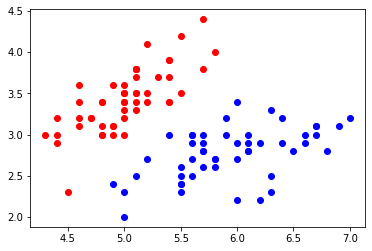

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

ax2 = [4, 7.5, 1.5, 4.5]

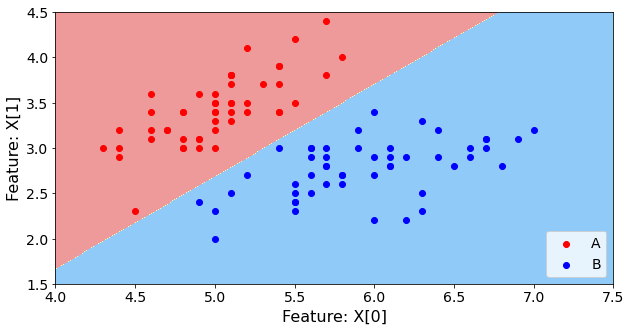

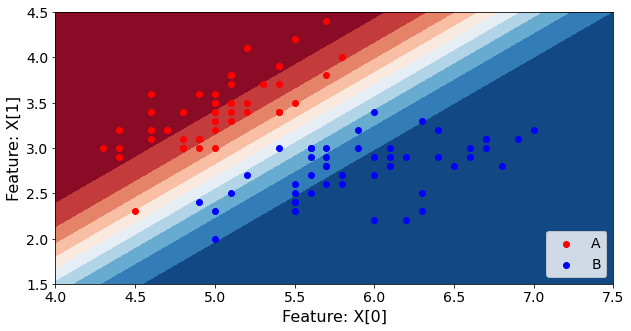

In [83]:
LR = LogisticRegression().fit(X, y)
plot_decision_boundary(LR,axis=ax2)
plot_proba_boundary(LR,axis=ax2)

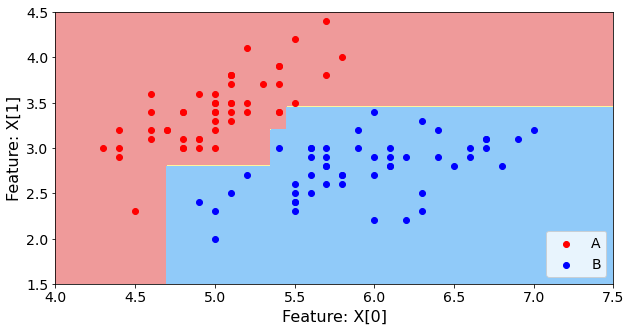

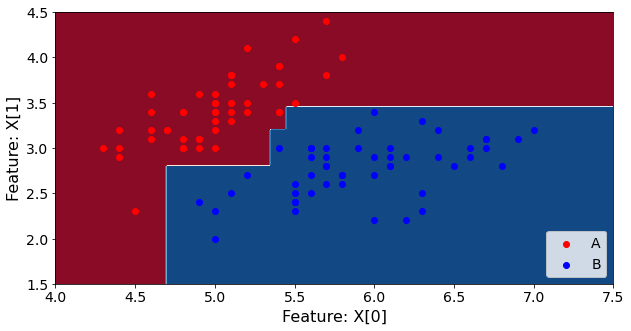

In [84]:
DT = DecisionTreeClassifier(max_depth =5).fit(X, y)
plot_decision_boundary(DT,axis=ax2)
plot_proba_boundary(DT,axis=ax2)

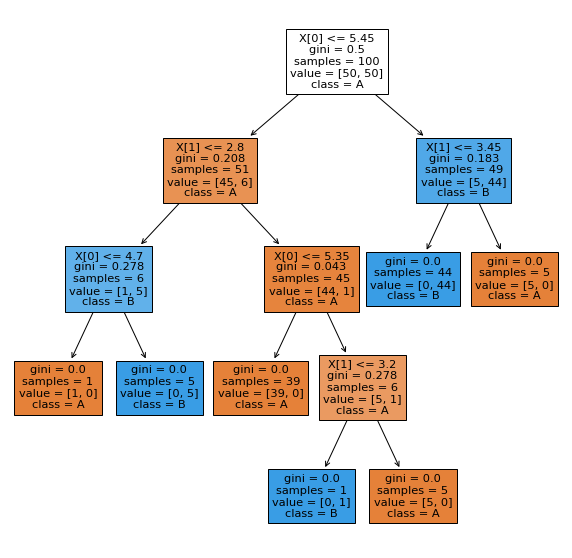

In [85]:
plt.figure(figsize=(10,10))
plot_tree(DT, filled=True,class_names=['A','B']);

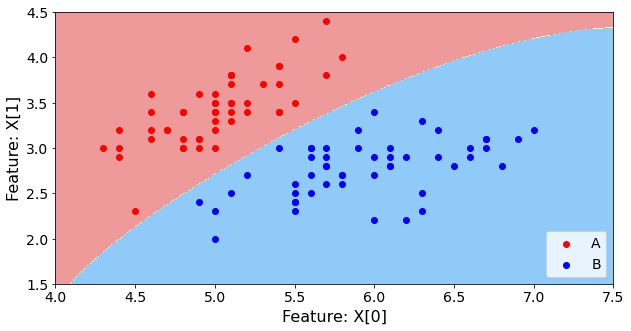

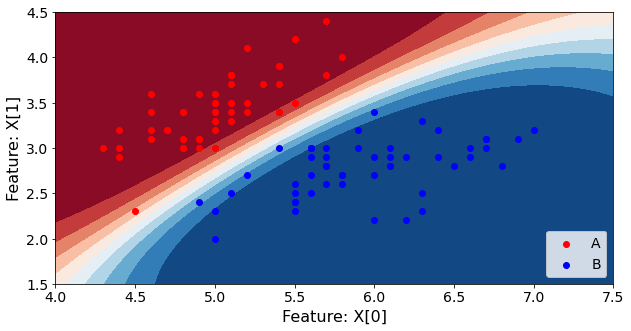

In [86]:
SVM = SVC(probability=True).fit(X, y)
plot_decision_boundary(SVM,axis=ax2)
plot_proba_boundary(SVM,axis=ax2)

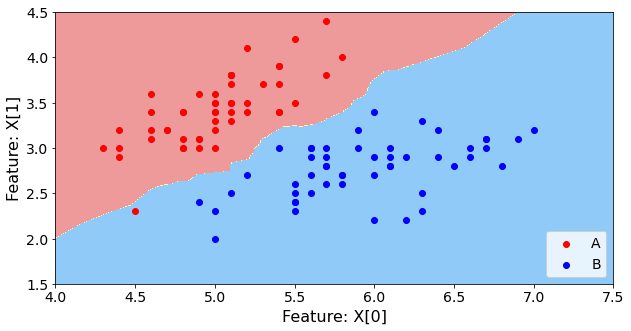

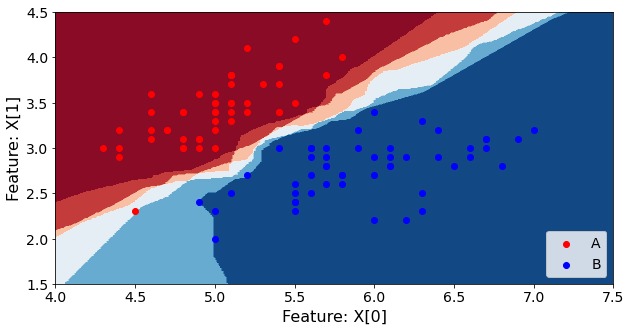

In [87]:
KNN = KNeighborsClassifier(n_neighbors=5).fit(X, y)
plot_decision_boundary(KNN,axis=ax2)
plot_proba_boundary(KNN,axis=ax2)

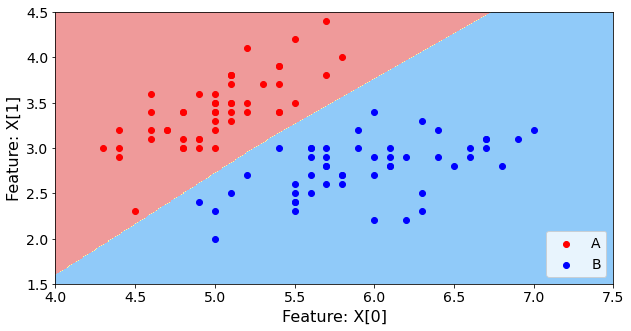

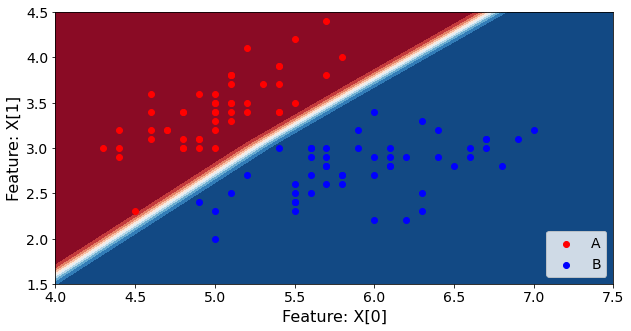

In [88]:
MLP = MLPClassifier(hidden_layer_sizes = (256,128,64,32)).fit(X, y)
plot_decision_boundary(MLP,axis=ax2)
plot_proba_boundary(MLP,axis=ax2)

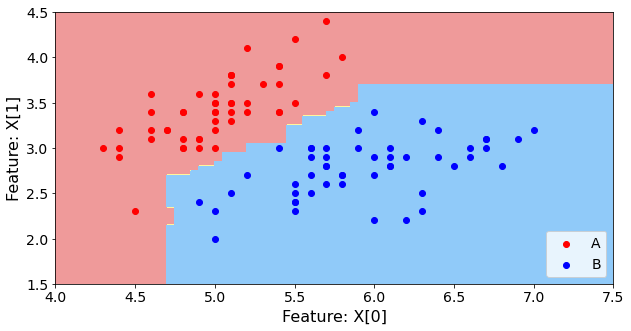

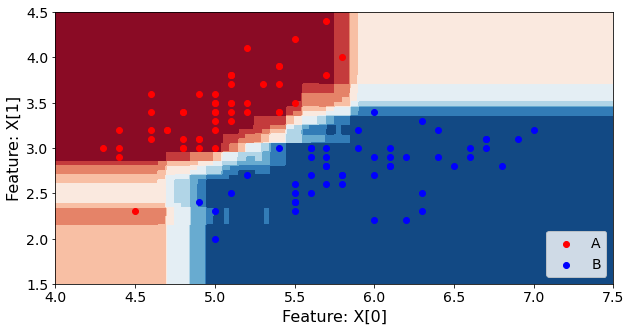

In [89]:
RF = RandomForestClassifier(n_estimators=100,random_state=233).fit(X, y)
plot_decision_boundary(RF,axis=ax2)
plot_proba_boundary(RF,axis=ax2)

## Part 2 More complex data

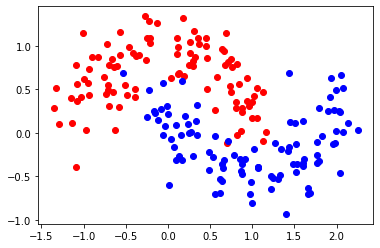

In [90]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

ax2 = [-1.5, 2.5, -1.0, 1.5]

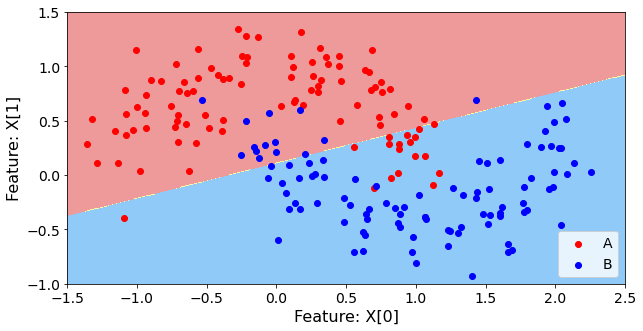

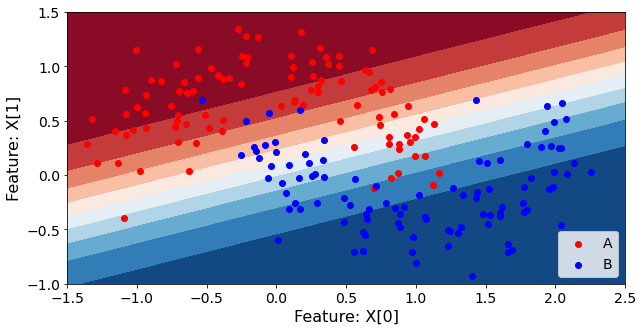

In [91]:
LR = LogisticRegression().fit(X, y)
plot_decision_boundary(LR,axis=ax2)
plot_proba_boundary(LR,axis=ax2)

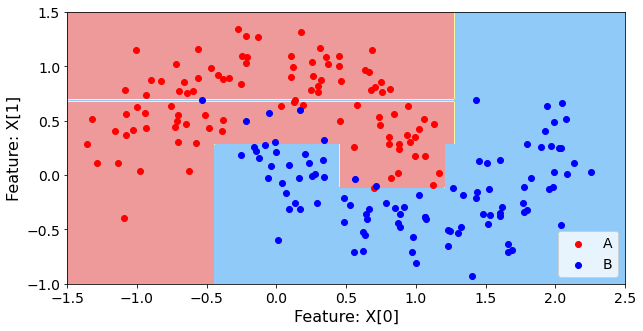

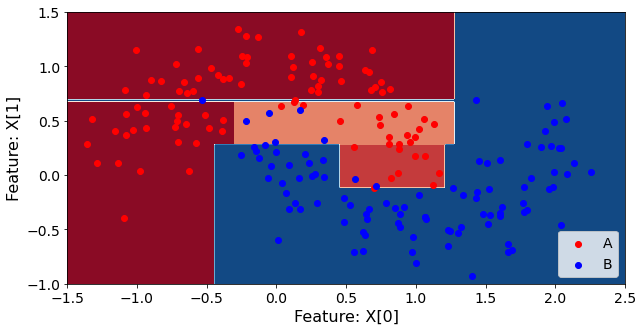

In [92]:
DT = DecisionTreeClassifier(max_depth =5).fit(X, y)
plot_decision_boundary(DT,axis=ax2)
plot_proba_boundary(DT,axis=ax2)

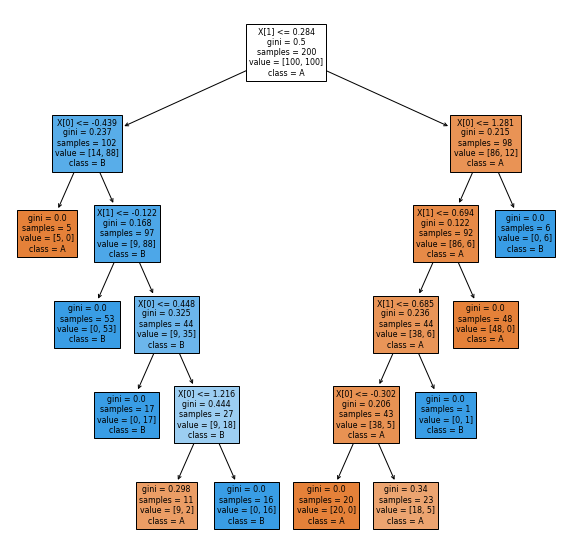

In [93]:
plt.figure(figsize=(10,10))
plot_tree(DT, filled=True,class_names=['A','B']);

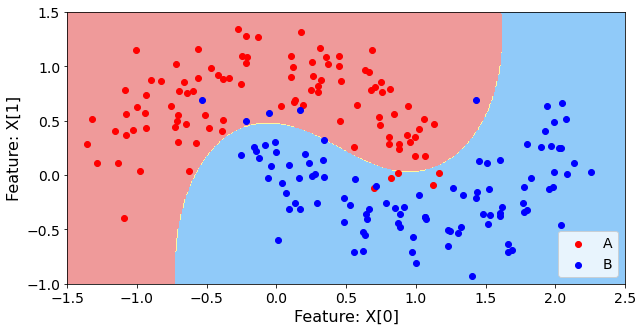

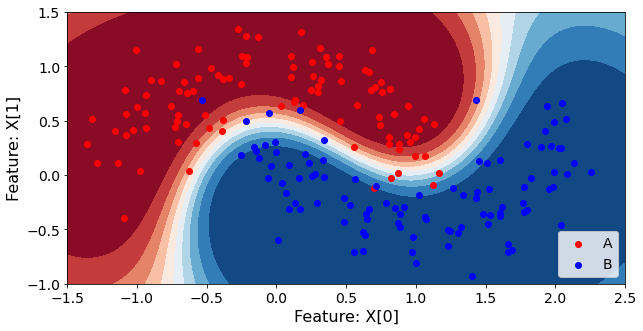

In [94]:
SVM = SVC(probability=True).fit(X, y)
plot_decision_boundary(SVM,axis=ax2)
plot_proba_boundary(SVM,axis=ax2)

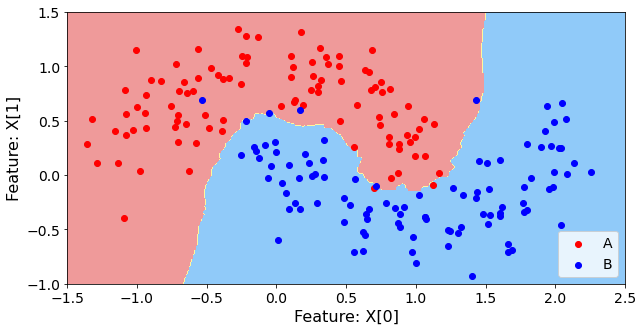

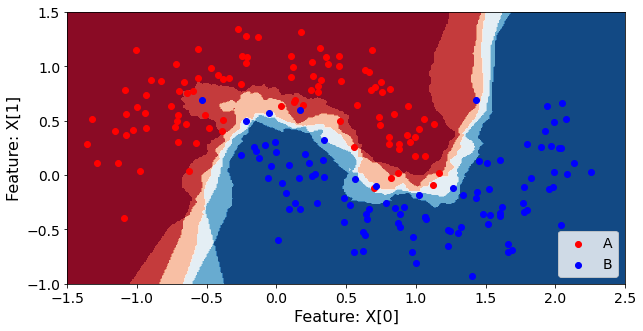

In [96]:
KNN = KNeighborsClassifier(n_neighbors=5).fit(X, y)
plot_decision_boundary(KNN,axis=ax2)
plot_proba_boundary(KNN,axis=ax2)

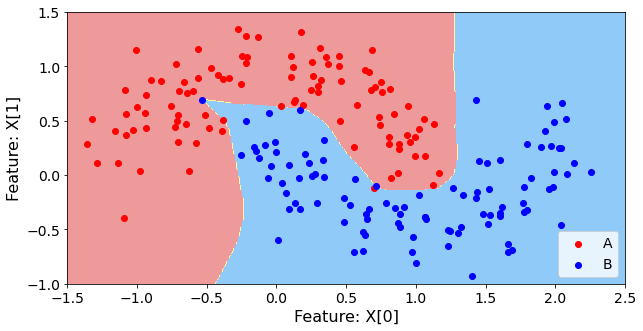

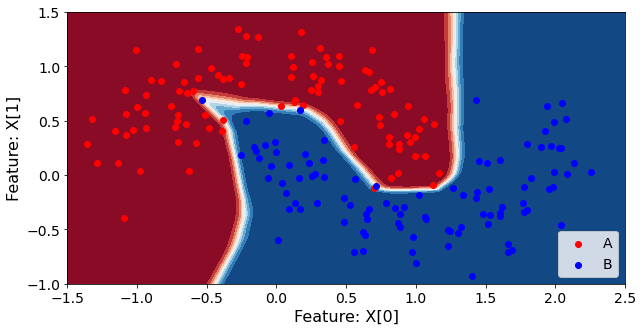

In [95]:
MLP = MLPClassifier(hidden_layer_sizes = (256,128,64,32)).fit(X, y)
plot_decision_boundary(MLP,axis=ax2)
plot_proba_boundary(MLP,axis=ax2)

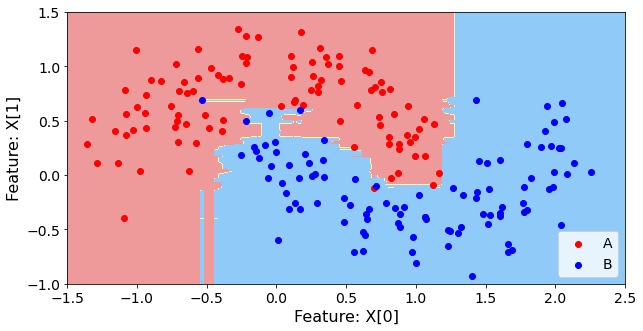

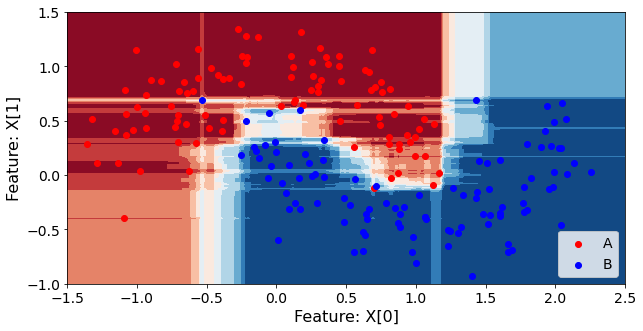

In [97]:
RF = RandomForestClassifier(n_estimators=100,random_state=233).fit(X, y)
plot_decision_boundary(RF,axis=ax2)
plot_proba_boundary(RF,axis=ax2)